## Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib as mtp
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


## Reading & Exploring Data

In [51]:
df = pd.read_csv('machine.data',header=None)
cols = ['vendor','model','myct','mmin','mmax','cach','chmin','chmax','prp','erp']
df.columns = cols
df.head(2)

,vendor,model,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253


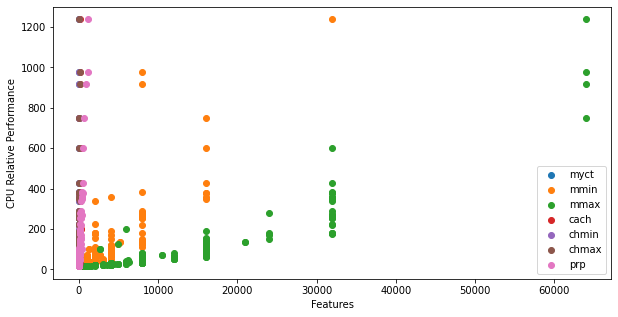

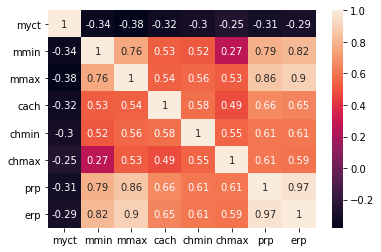

In [52]:
plt.figure(figsize=(10,5))
target = 'erp'
features = cols[2:9]
for feature in features:
    plt.scatter(x=df[feature],y=df[target],label=feature,marker='o')
plt.xlabel("Features")
plt.ylabel("CPU Relative Performance")
plt.legend()
plt.show()
sns.heatmap(data=df.corr(),annot=True)
plt.show()

## Separating Training & Test Data

In [53]:
x_train, x_test, y_train, y_test = train_test_split(df[features],df[target],
                                    test_size=0.35,random_state=40)

## Linear Regression

In [54]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [55]:
results = regressor.predict(x_test)

## Model Accuracy

In [56]:
# using mse and its square-root
mse = mean_squared_error(y_test,results)
np.sqrt(mse)

30.94890500160259

In [57]:
# using absolute errors and mean absolute errors
absolute_errors = abs(results-y_test) #returns the array of errors
avg_abs_error = round(np.mean(absolute_errors))
avg_abs_error

21

In [58]:
# percentage of error using absolute errors
error_percentage = (absolute_errors/y_test) * 100
avg_error_percentage = np.mean(error_percentage)
print("Accuracy : " , round(100-avg_error_percentage), "%")

Accuracy :  64 %


## Features Importances

In [59]:
importances = regressor.coef_
for index in range(len(importances)):
    print(features[index], ":",round(importances[index],3))
print("Intercept :", regressor.intercept_)

myct : 0.045
mmin : 0.006
mmax : 0.004
cach : 0.073
chmin : 0.116
chmax : 0.294
prp : 0.587
Intercept : -37.27571043522745


## Plotting Predictions vs Actual 

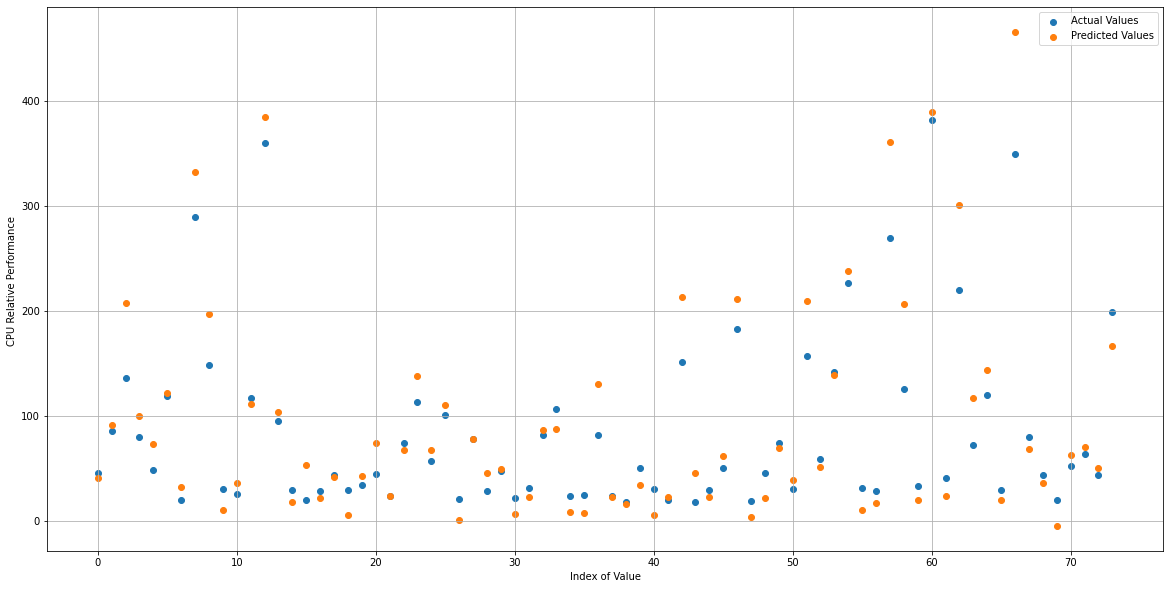

In [60]:
indexes = []   # this is as a dummy x-axis
for i in range(len(y_test)):
    indexes.append(i)
plt.figure(figsize=(20,10))
plt.scatter(indexes,y_test,label="Actual Values")
plt.scatter(indexes,results,label="Predicted Values")
plt.xlabel("Index of Value")
plt.ylabel("CPU Relative Performance ")
plt.legend()
plt.grid(True)
plt.show()